# Leukemia Dataset
Acute lymphoblastic leukemia (ALL) constitutes approximately 25% of the pediatric cancers. In general, the task of identifying immature leukemic blasts from normal cells under the microscope is challenging because morphologically the images of the two cells appear similar.
## Composition
Train set composition:

Total subjects: 73, ALL (cancer): 47, Normal: 26

Total cell images: 10,661, ALL(cancer): 7272, Normal: 3389

Preliminary test set composition:

Total subjects: 28, ALL (cancer): 13, Normal: 15

Total cell images: 1867, ALL(cancer): 1219, Normal: 648

Final test set composition:

Total subjects: 17, ALL (cancer): 9, Normal: 8

Total cell images: 2586

**IMPORT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import os
import tqdm
import skimage.io
import glob

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize

from sklearn.utils import shuffle
import seaborn as sns
%matplotlib inline

**IMPORT / VIEWING / PREPROCESSING DATASET**

In [2]:
# Reading Data

train_dataset_0_all = glob.glob('../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/all/*.bmp')
train_dataset_0_hem = glob.glob('../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/hem/*.bmp')
train_dataset_1_all = glob.glob('../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/*.bmp')
train_dataset_1_hem = glob.glob('../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/hem/*.bmp')
train_dataset_2_all = glob.glob('../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/all/*.bmp')
train_dataset_2_hem = glob.glob('../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/hem/*.bmp')

#test_dataset  = glob.glob('../input/leukemia-classification/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data/*.bmp')
#valid_dataset = glob.glob('../input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/*.bmp')

valid_data    = pd.read_csv('../input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')

**DATA PREPROCESSING**

In [3]:
A = []
H = []

A.extend(train_dataset_0_all)
A.extend(train_dataset_1_all)
A.extend(train_dataset_2_all)

H.extend(train_dataset_0_hem)
H.extend(train_dataset_1_hem)
H.extend(train_dataset_2_hem)

A = np.array(A)
H = np.array(H)

len(A),len(H)

(7272, 3389)

In [4]:
Label = []

for i in tqdm(range(0, len(A))):
    Label.append(1)
    
for i in tqdm(range(0, len(H))):
    Label.append(0)
    
Label = np.array(Label)

Label.shape

100%|██████████| 3389/3389 [00:00<00:00, 1140718.74it/s]


(10661,)

In [5]:
X = []
Y = []

for i in tqdm(range(0, 100)):
    img = imread(A[i])
    img = resize(img, (128,128))
    X.append(img)
    Y.append(1)
    
for i in tqdm(range(0, 100)):
    img = imread(H[i])
    img = resize(img, (128,128))
    X.append(img)
    Y.append(0)
    
    
X = np.array(X)
Y = np.array(Y)

X.shape, Y.shape

100%|██████████| 100/100 [00:02<00:00, 45.98it/s]


((200, 128, 128, 3), (200,))

In [6]:
# Shuffle the data as results are appened.

X, Y = shuffle(X, Y, random_state = 42)

100%|██████████| 5/5 [00:00<00:00, 678.87it/s]


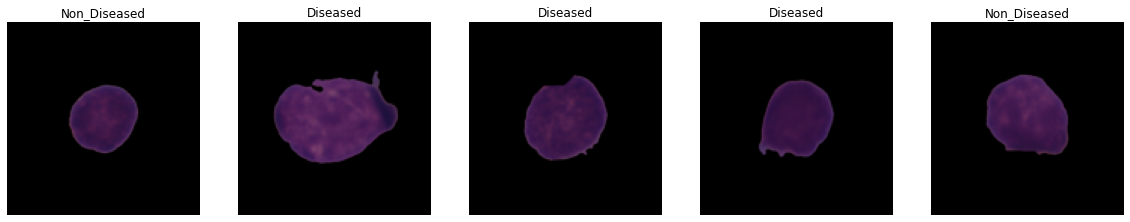

In [7]:
# Viewing Image - After Shuffle 

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(X))
    ax[i].imshow(X[rand])
    ax[i].axis('off')
    a = Y[rand]
    if a == 1:
        ax[i].set_title('Diseased')
    else:
        ax[i].set_title('Non_Diseased')

In [8]:
valid_data.head()

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1


Leukemia: 7272
Non-Disease: 3389


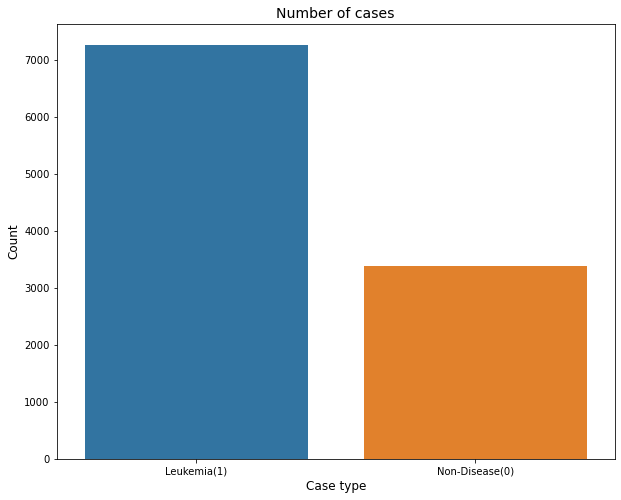

In [9]:
# Get the counts for each class
print(f"Leukemia: {sum(Label == 1)}\nNon-Disease: {sum(Label == 0)}")

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=["Leukemia", "Non-Disease"], y=[sum(Label == 1),sum(Label == 0)])
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(2), ["Leukemia(1)", "Non-Disease(0)"])
plt.show()